# Isolation Forests using [`sklearn.ensemble.IsolationForest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
Uses decision trees


## Python implementation from Lab

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig  # saving generated figures
from sklearn.ensemble import IsolationForest  # uses decision trees to predict

### Random data

In [2]:
rng = np.random.RandomState(42)

### Generating training data
This is good normal data.  
1000 tuples, 2 attributes

In [3]:
X_train = 0.2*rng.randn(1000,2)
X_train = np.r_[X_train+3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

### Generating new, normal observations

In [4]:
X_test = 0.2*rng.rand(200, 2)
X_test = np.r_[X_test+3, X_test]
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

### Generating abnormal observations

In [5]:
X_outliers = rng.uniform(low = -1, high = 5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=['x1', 'x2'])

### Visualizing the data before outlier detection
- Train in white
- Test in green
- Outliers in red  
**Note that some red outliers are in the clusters, but the isolation forrect will still class them as outliers, this is an incorrect classification**

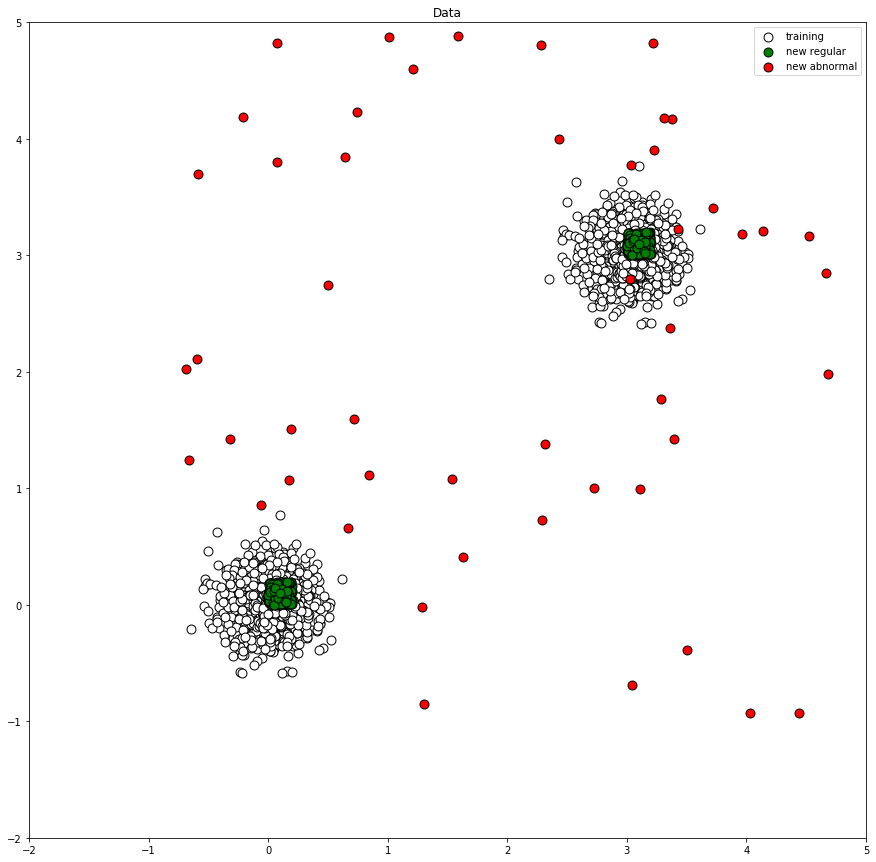

In [6]:
plt.figure(figsize=(15, 15))

plt.title('Data')
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3], ['training', 'new regular', 'new abnormal'])
plt.show()


### Running Isolation Forest to predict outliers
- `max_samples` is how many decision trees we want created

In [7]:
clf = IsolationForest(max_samples=100, contamination=0.1, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

### Accuracy Check
- 1 is the label for normal
- -1 is the label for abnormal

In [8]:
print('accuracy', list(y_pred_test).count(1)/y_pred_test.shape[0])
print('accuracy', list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

accuracy 1.0
accuracy 0.98


### Visualizing the results from Isolation Forrest
Some outliers will now be classed as green

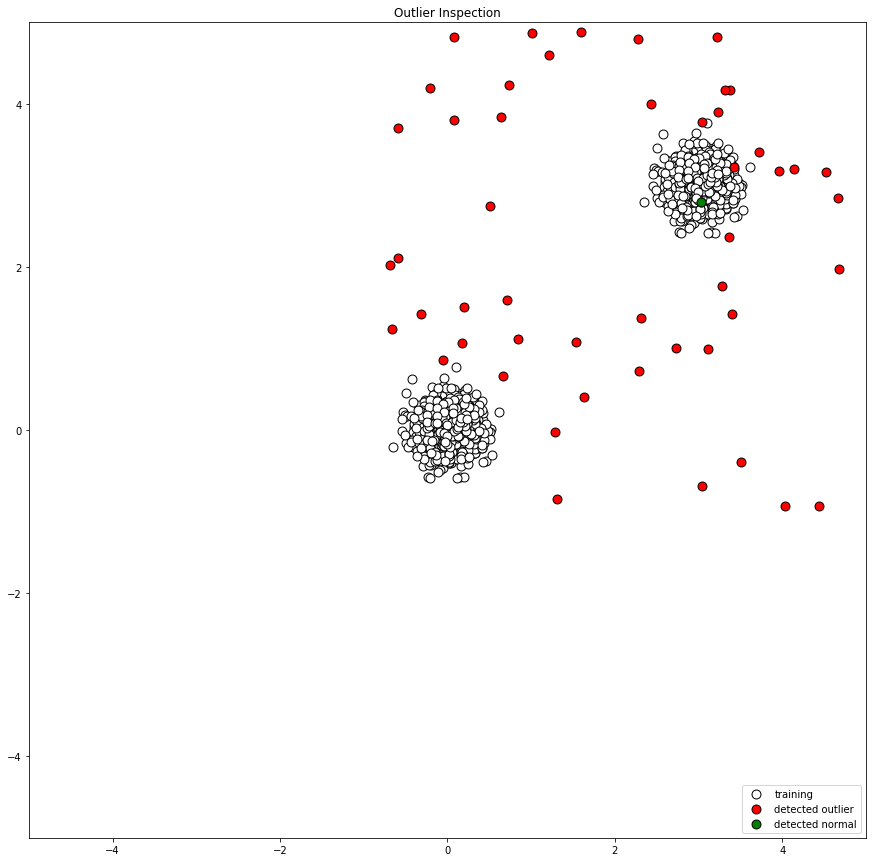

In [9]:
X_outliers = X_outliers.assign(y=y_pred_outliers)

plt.figure(figsize=(15, 15))

plt.title('Outlier Inspection')

# plotting normals in white
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*4, edgecolor='k')

# plotting outliers as red
# if red is in a cluster, then it was incorrectly classsified
p2 = plt.scatter(
    X_outliers.loc[X_outliers.y == -1, ['x1']],
    X_outliers.loc[X_outliers.y == -1, ['x2']],
    c='red', s=20*4, edgecolor='k'
)

# detected normal green
p3 = plt.scatter(
    X_outliers.loc[X_outliers.y == 1, ['x1']],
    X_outliers.loc[X_outliers.y == 1, ['x2']],
    c='green', s=20*4, edgecolor='k'
)

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([p1, p2, p3], ['training', 'detected outlier', 'detected normal'], loc='lower right')